In [111]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
import random
import tkinter as tk
from tkinter import *

In [112]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
circ = QuantumCircuit(qr,cr)

In [113]:
def get_gates_random(n):
    gate_type = ["H", "I", "X", "Y", "Z"]
    sqe = list(range(0, n))
    return(random.choice(gate_type), random.choice(sqe))

In [118]:
def options_gate(n):
    # n is the number of qubits of interest
    global one
    global two
    
    one = get_gates_random(n)
    two = get_gates_random(n)
    
    return(one,two)



In [115]:
## This is the function of interest

def gate_apply(user_input, n):
    if(user_input) == "I":
        print("none")
    if(user_input) == "X":
        circ.x(qr[n])
    if(user_input) == "Y":
        circ.y(qr[n])
    if(user_input) == "Z":
        circ.z(qr[n])
    if(user_input) == "H":
        circ.h(qr[n])

In [119]:
options_gate(2)
master = Tk()
user_input = Entry(master)

In [120]:
def ButtonOneCallback():
    value = user_input.get()
    gate_apply(one[0], one[1])

def ButtonTwoCallback():
    value = user_input.get()
    gate_apply(two[0], two[1])
    
button1 = Button(master, text= one, command=ButtonOneCallback)
button1.pack()
button2 = Button(master, text= two, command=ButtonTwoCallback)
button2.pack()
mainloop()

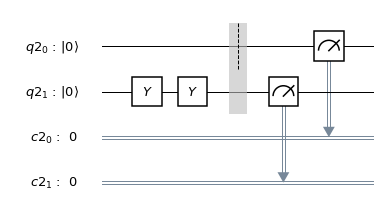

In [121]:
circ.barrier(qr[0], qr[1])
circ.measure(qr,cr)
circ.draw(output = 'mpl')